загрузим датасет с кагл

In [1]:
!pip install opendatasets
!pip install pandas
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/yasserh/titanic-dataset/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saintsjane
Your Kaggle Key: ··········


100%|██████████| 22.0k/22.0k [00:00<00:00, 9.52MB/s]

In [2]:
import pandas as pd
train = pd.read_csv('/content/titanic-dataset/Titanic-Dataset.csv',index_col=0)
train.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
train.tail(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(train.columns)
print(" ".join(train.columns))

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked


In [5]:
train.columns = [col.lower().replace(' ','') for col in train.columns]
print(*train.columns,sep = ', ')

survived, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Проверим путсые ячейки в датасете

In [8]:
train.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [9]:
train.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

Больше всего пропущенных значений в переменной Cabin. Они также есть в переменных Age и Embarked.
переменная Cabin (номер каюты), скорее всего, не является самой важной избавимся от нее

In [10]:
del train['cabin']

In [11]:
train.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
embarked      2
dtype: int64

а вот Age (возраст) точно важен, заменим пустые значения средним арифметическим

In [12]:
train['age'].fillna(train['age'].mean(), inplace = True)

In [13]:
train.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    2
dtype: int64

у нас остаются две пустые строки в Embarked, удалим их

In [14]:
train.dropna(inplace = True)

In [15]:
train.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

<Axes: xlabel='survived', ylabel='count'>

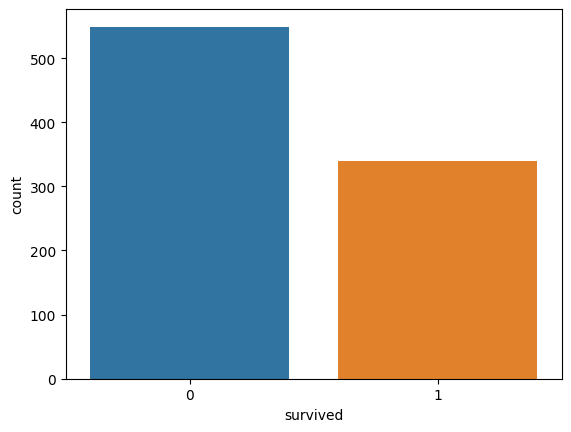

In [37]:
sns.countplot(x='survived', data=train)

<Axes: xlabel='survived', ylabel='count'>

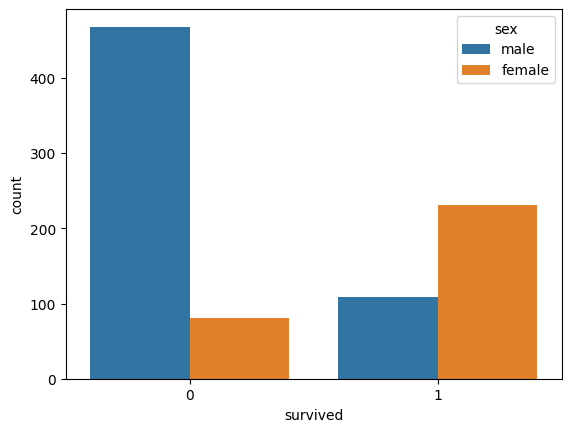

In [38]:
sns.countplot(x='survived', hue='sex', data=train)

In [19]:
survived_sex = train.pivot_table(index="sex", values="survived")
survived_sex

,survived
sex,
female,0.740385
male,0.188908


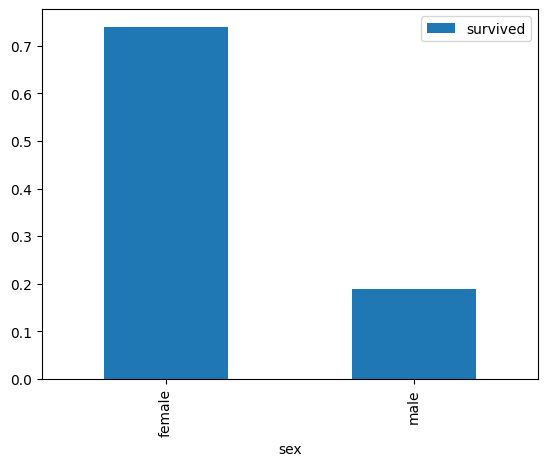

In [28]:
survived_sex = train.pivot_table(index="sex", values="survived")
survived_sex

survived_sex.plot.bar()
plt.show()

<Axes: xlabel='survived', ylabel='count'>

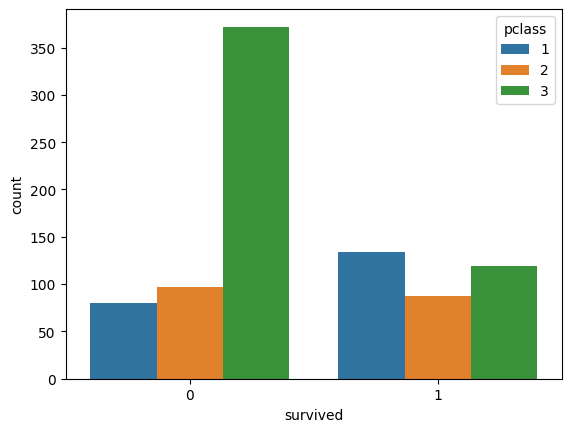

In [40]:
sns.countplot(x='survived', hue='pclass', data=train)

In [27]:
train.pivot_table(index="pclass", values="survived")

,survived
pclass,
1,0.626168
2,0.472826
3,0.242363


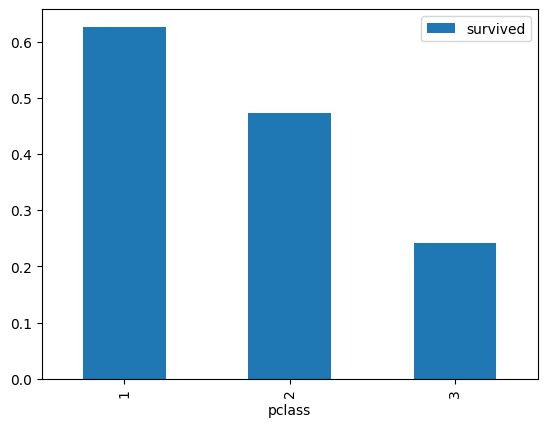

In [21]:
survived_pclass = train.pivot_table(index="pclass", values="survived")
survived_pclass

survived_pclass.plot.bar()
plt.show()

<Axes: xlabel='survived', ylabel='count'>

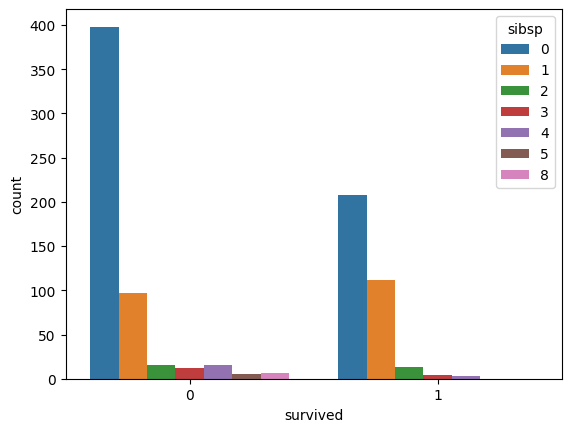

In [41]:
sns.countplot(x='survived', hue='sibsp', data=train)

In [24]:
train.pivot_table(index="sibsp", values="survived")

,survived
sibsp,
0,0.343234
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


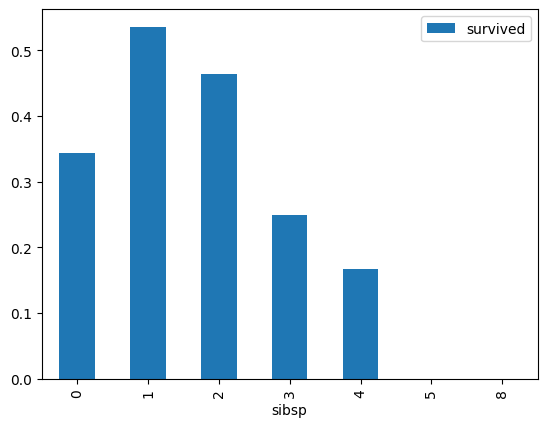

In [25]:
survived_sibsp = train.pivot_table(index="sibsp", values="survived")
survived_sibsp

survived_sibsp.plot.bar()
plt.show()

<Axes: xlabel='survived', ylabel='count'>

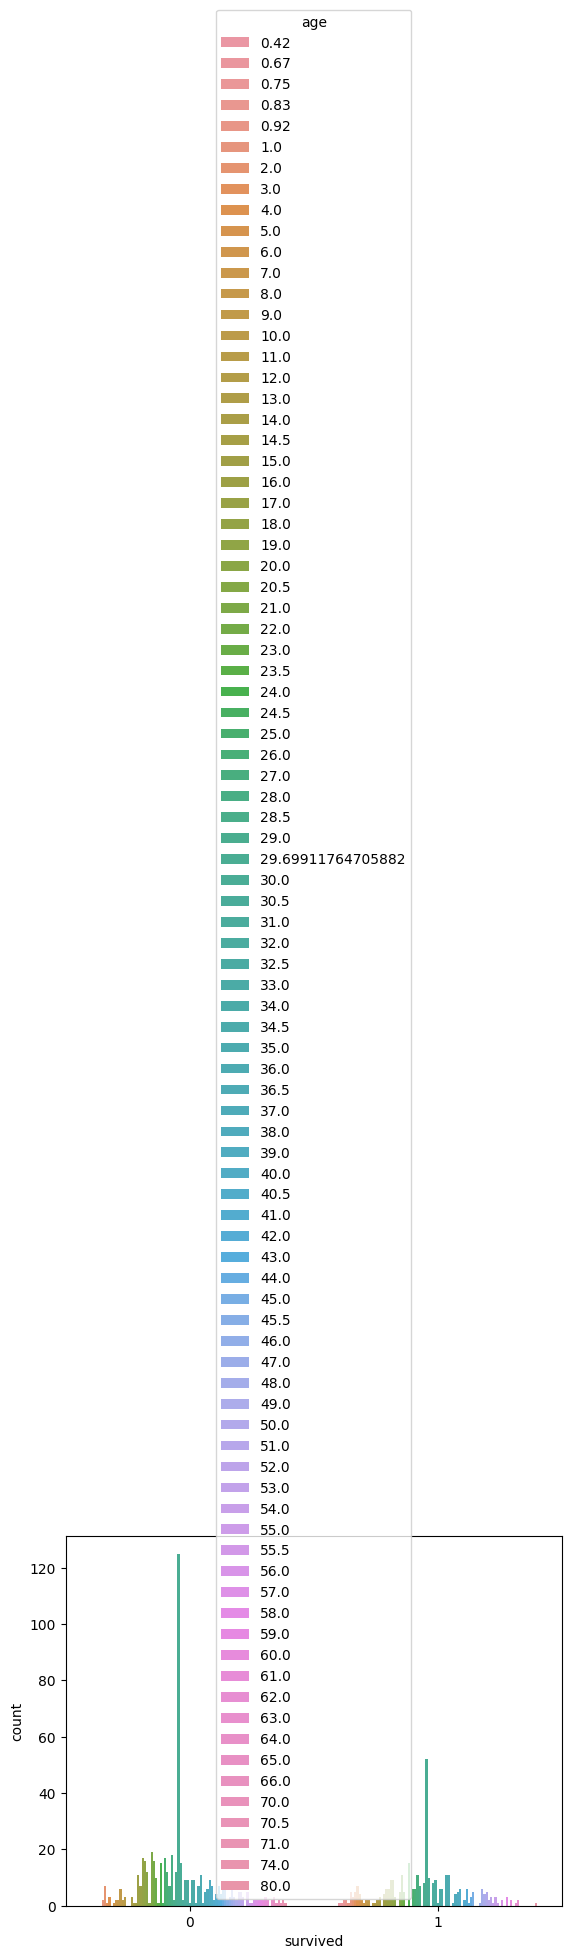

In [42]:
sns.countplot(x='survived', hue='age', data=train)

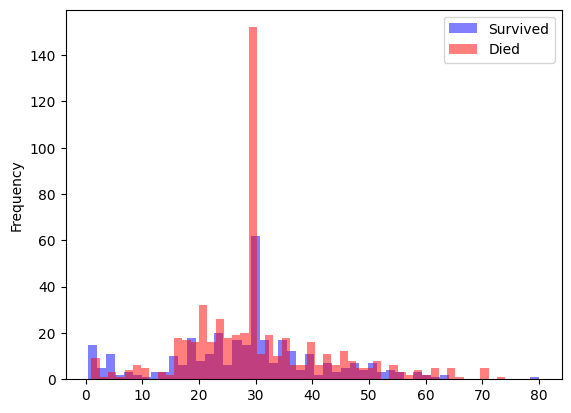

In [34]:
df_survived = train[train["survived"] == 1]
df_died = train[train["survived"] == 0]

df_survived["age"].plot.hist(alpha=0.5, color='blue', bins=50)
df_died["age"].plot.hist(alpha=0.5, color='red', bins=50)

plt.legend(['Survived', 'Died'])
plt.show()

In [43]:
train.pivot_table(index="parch", values="survived")

,survived
parch,
0,0.341716
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


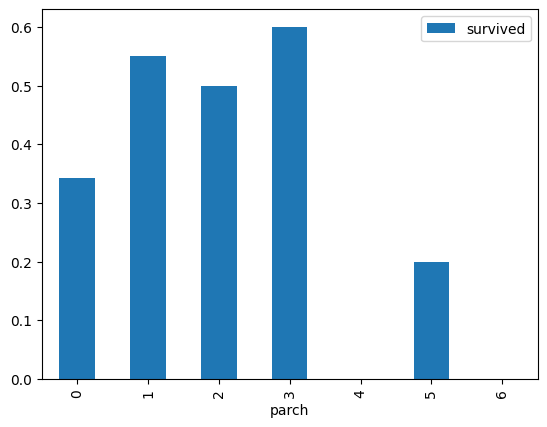

In [44]:
survived_parch = train.pivot_table(index="parch", values="survived")
survived_parch

survived_parch.plot.bar()
plt.show()

In [46]:
train.pivot_table(index="embarked", values="survived")

,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


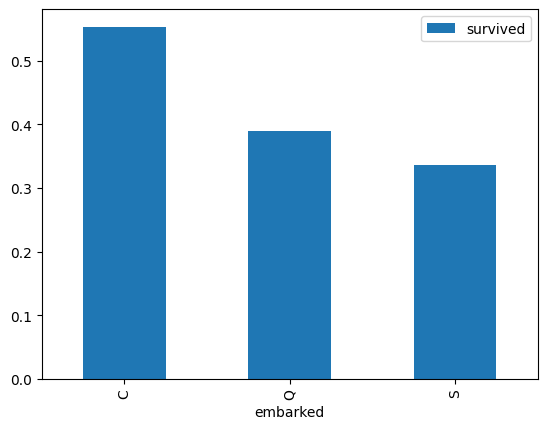

In [47]:
survived_embarked = train.pivot_table(index="embarked", values="survived")
survived_embarked

survived_embarked.plot.bar()
plt.show()